In [1]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

In [3]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

In [5]:
import xlrd
import pandas as pd
import numpy as np
import scipy
import openpyxl

from pyproj import Proj, transform

import warnings
warnings.filterwarnings('ignore')

In [6]:
excel_file = pd.ExcelFile("./Daten/Gemeinde inkl. geo.xlsx")
gemeinden_geo_2021 = pd.read_excel(excel_file)

In [7]:
gemeinden_geo_2021.head(10)

,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,GPS,Kleine Rechtsparteien,Berichtsjahr,PLZ,Gemeindename,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N
0,Aeugst am Albis,1,1981,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,7.065355,...,15.050475,3.820647,2021,8914,Aeugst am Albis,ZH,2679435.817,1235653.185,47.267004,8.488313
1,Zwillikon,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,12.590564,1.555518,2021,8909,Affoltern am Albis,ZH,2675104.519,1237890.488,47.287633,8.431459
2,Affoltern am Albis,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,12.590564,1.555518,2021,8910,Affoltern am Albis,ZH,2676439.358,1236966.371,47.279169,8.448945
3,Bonstetten,3,5572,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,4.316547,...,12.368531,1.385022,2021,8906,Bonstetten,ZH,2677798.571,1241024.843,47.315510,8.467611
4,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,16.744127,1.610747,2021,8915,Hausen am Albis,ZH,2682996.334,1232961.650,47.242360,8.534860
5,Ebertswil,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,16.744127,1.610747,2021,8925,Hausen am Albis,ZH,2684168.704,1231176.639,47.226157,8.550009
6,Hedingen,5,3778,10.791789,578.560490,16.410799,21.625199,61.646374,16.728428,3.727370,...,12.348734,2.170676,2021,8908,Hedingen,ZH,2676518.511,1239054.300,47.297938,8.450347
7,Kappel am Albis,6,1221,33.006536,154.166667,17.526618,24.979525,61.179361,13.841114,3.364172,...,10.179641,1.627514,2021,8926,Kappel am Albis,ZH,2682261.569,1231284.424,47.227367,8.524850
8,Knonau,7,2378,32.111111,367.542504,18.292683,24.348192,60.975610,14.676198,3.367712,...,11.349401,2.202680,2021,8934,Knonau,ZH,2677402.530,1230821.895,47.223794,8.460617
9,Maschwanden,8,645,4.707792,137.526652,12.868217,22.015504,59.534884,18.449612,3.074558,...,10.017575,2.987698,2021,8933,Maschwanden,ZH,2674785.638,1232061.104,47.235241,8.426274


In [8]:
type(gemeinden_geo_2021)

pandas.core.frame.DataFrame

## Anreichern

In [9]:
# Import der Gemeindecode
code = pd.ExcelFile('./Rohdaten/Gemeindecodes_BFS.xls')
gemeinde_code = pd.read_excel(code, sheet_name='PLZ4')
gemeinde_code.head()

,PLZ4,%_IN_GDE,GDENR,KTKZ,GDENAMK
0,1000,100.0,VD,5586,Lausanne
1,1003,100.0,VD,5586,Lausanne
2,1004,100.0,VD,5586,Lausanne
3,1005,100.0,VD,5586,Lausanne
4,1006,99.9,VD,5586,Lausanne


In [10]:
type(gemeinden_geo_2021)
a = pd.merge(gemeinden_geo_2021, gemeinde_code, how = 'left', left_on = ['Gemeindecode'], right_on = ['KTKZ'])

a.head(20)

,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N,PLZ4,%_IN_GDE,GDENR,KTKZ,GDENAMK
0,Aeugst am Albis,1,1981,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,7.065355,...,ZH,2679435.817,1235653.185,47.267004,8.488313,8914.0,100.0,ZH,1.0,Aeugst am Albis
1,Zwillikon,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,ZH,2675104.519,1237890.488,47.287633,8.431459,8909.0,100.0,ZH,2.0,Affoltern am Albis
2,Zwillikon,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,ZH,2675104.519,1237890.488,47.287633,8.431459,8910.0,100.0,ZH,2.0,Affoltern am Albis
3,Affoltern am Albis,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,ZH,2676439.358,1236966.371,47.279169,8.448945,8909.0,100.0,ZH,2.0,Affoltern am Albis
4,Affoltern am Albis,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,ZH,2676439.358,1236966.371,47.279169,8.448945,8910.0,100.0,ZH,2.0,Affoltern am Albis
5,Bonstetten,3,5572,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,4.316547,...,ZH,2677798.571,1241024.843,47.315510,8.467611,8906.0,100.0,ZH,3.0,Bonstetten
6,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,ZH,2682996.334,1232961.650,47.242360,8.534860,6340.0,0.3,ZH,4.0,Hausen am Albis
7,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,ZH,2682996.334,1232961.650,47.242360,8.534860,8915.0,100.0,ZH,4.0,Hausen am Albis
8,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,ZH,2682996.334,1232961.650,47.242360,8.534860,8925.0,100.0,ZH,4.0,Hausen am Albis
9,Ebertswil,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,ZH,2684168.704,1231176.639,47.226157,8.550009,6340.0,0.3,ZH,4.0,Hausen am Albis


In [11]:
def find_outliers_IQR_univariant_df(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [12]:
def find_outliers_IQR_multivariant_df(df, name_of_column):

   q1=df[name_of_column].quantile(0.25)

   q3=df[name_of_column].quantile(0.75)

   IQR=q3-q1

   outliers = df[((df[name_of_column]<(q1-1.5*IQR)) | (df[name_of_column]>(q3+1.5*IQR)))]

   return outliers

In [13]:
gemeinden_geo_2021['Sozialhilfequote']

0       1.01
1       3.02
2       3.02
3       1.51
4       1.19
        ... 
3150    2.37
3151    1.46
3152    1.46
3153    1.46
3154    1.46
Name: Sozialhilfequote, Length: 3155, dtype: float64

In [14]:
df_outliers_sozialhilfequote1 = find_outliers_IQR_univariant_df(gemeinden_geo_2021['Sozialhilfequote'])

df_outliers_sozialhilfequote = find_outliers_IQR_multivariant_df(gemeinden_geo_2021,'Sozialhilfequote')

In [15]:
# Entfernt duplikate
df_outliers_sozialhilfequote.drop_duplicates(subset=['Sozialhilfequote'], inplace=True)
print(type(df_outliers_sozialhilfequote))
df_outliers_sozialhilfequote.head
# Sortieren
df_outliers_sozialhilfequote.sort_values(by='Sozialhilfequote', ascending=False)

<class 'pandas.core.frame.DataFrame'>


,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,GPS,Kleine Rechtsparteien,Berichtsjahr,PLZ,Gemeindename,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N
516,Tavannes,713,3570,2.645198,241.542625,25.182073,22.156863,60.056022,17.787115,2.515372,...,14.396613,3.599153,2021,2710,Tavannes,BE,2.581728e+06,1.230092e+06,47.221500,7.197395
2966,La Chaux-de-Fonds,6421,37494,-0.026664,672.900215,30.287513,20.787326,60.284312,18.928362,3.764282,...,21.405850,0.000000,2021,2300,La Chaux-de-Fonds,NE,2.554035e+06,1.217192e+06,47.104125,6.833091
342,Biel/Bienne,371,55602,8.591293,2623.973572,33.973598,19.414769,62.366462,18.218769,4.171143,...,24.143290,1.577379,2021,2502,Biel/Bienne,BE,2.585367e+06,1.221241e+06,47.141984,7.245725
529,Brügg BE,733,4370,5.149182,874.000000,24.393593,20.160183,58.558352,21.281465,5.251142,...,16.479986,1.859757,2021,2555,Brügg,BE,2.587820e+06,1.219185e+06,47.123540,7.278121
3018,Aire-la-Ville,6601,1169,0.949914,398.976109,16.424294,25.919589,60.393499,13.686912,2.549936,...,20.695525,6.420233,2021,1288,Aire-la-Ville,GE,2.492287e+06,1.116446e+06,46.190837,6.043392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Rueyres,5534,265,8.606557,132.500000,12.452830,28.301887,55.849057,15.849057,0.000000,...,14.256198,0.103306,2021,1046,Rueyres,VD,2.542882e+06,1.171632e+06,46.693449,6.691896
184,Winterthur,230,113173,11.711810,1662.597326,24.535004,19.974729,63.804088,16.221183,6.070464,...,17.783986,1.471013,2021,8400,Winterthur,ZH,2.697279e+06,1.260896e+06,47.491622,8.729549
677,Huttwil,954,5004,6.377551,290.255220,13.828937,20.323741,58.633094,21.043165,3.837609,...,7.448961,8.213563,2021,4950,Huttwil,BE,2.631217e+06,1.218162e+06,47.113720,7.849954
1326,Pratteln,2831,16650,8.638914,1556.074766,41.297297,18.858859,61.609610,19.531532,4.507753,...,19.173980,0.000000,2021,4133,Pratteln,BL,2.618790e+06,1.262799e+06,47.515667,7.688076


In [16]:
gr=df_outliers_sozialhilfequote.groupby(['Kantonskürzel'])
gr.count()

,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,PdA/Sol.,GPS,Kleine Rechtsparteien,Berichtsjahr,PLZ,Gemeindename,LV95_E,LV95_N,WGS84_E,WGS84_N
Kantonskürzel,,,,,,,,,,,,,,,,,,,,,
BE,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
BL,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
BS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GE,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
JU,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
NE,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
SO,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
TI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VD,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21


In [17]:

df_outliers_sozialhilfequote.to_excel('SozialHilfeQuoteOutliers.xlsx')

In [18]:
df_outliers_leerwohnungsziffer = find_outliers_IQR_multivariant_df(gemeinden_geo_2021,'Leerwohnungs-ziffer')

In [19]:
# Entfernt duplikate
df_outliers_leerwohnungsziffer.drop_duplicates(subset=['Leerwohnungs-ziffer'], inplace=True)
print(type(df_outliers_leerwohnungsziffer))
df_outliers_leerwohnungsziffer.head
# Sortieren
df_outliers_leerwohnungsziffer.sort_values(by='Leerwohnungs-ziffer', ascending=False)

<class 'pandas.core.frame.DataFrame'>


,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,GPS,Kleine Rechtsparteien,Berichtsjahr,PLZ,Gemeindename,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N
2482,Yvorne,5415,1067,8.655804,87.459016,18.650422,20.618557,60.918463,18.462980,2.815580,...,12.876494,0.653386,2021,1853,Yvorne,VD,2563208.441,1131168.431,46.330897,6.960861
2517,Montricher,5492,966,17.233010,37.125288,17.080745,20.186335,63.561077,16.252588,4.177546,...,15.998723,0.335303,2021,1147,Montricher,VD,2518651.448,1161650.598,46.601151,6.376921
1991,Teufenthal AG,4145,1641,3.467844,459.663866,26.203534,17.306520,64.411944,18.281536,5.433142,...,6.693771,1.597212,2021,5723,Teufenthal (AG),AG,2651383.198,1242105.122,47.327812,8.118380
2099,Koblenz,4310,1689,6.831120,413.970588,42.391948,19.597395,64.416815,15.985790,6.569125,...,8.604119,0.068650,2021,5322,Koblenz,AG,2660129.673,1273325.457,47.607854,8.238288
2465,Chessel,5403,428,22.285714,120.563380,17.757009,20.093458,64.953271,14.953271,4.683841,...,19.039666,0.125261,2021,1846,Chessel,VD,2558094.444,1133279.561,46.349587,6.894261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,Charrat,6136,20210,15.104226,620.128874,30.341415,21.053934,61.994062,16.952004,5.103052,...,12.480257,0.000000,2021,1906,Martigny,VS,2576126.500,1108046.219,46.123486,7.129802
1396,Schleitheim,2952,1653,-1.017964,76.421637,15.607985,18.390805,56.563823,25.045372,3.599280,...,4.228330,8.456660,2021,8226,Schleitheim,SH,2678740.615,1289310.086,47.749626,8.488614
2687,Ropraz,5798,488,32.608696,101.455301,20.491803,25.614754,61.475410,12.909836,10.172940,...,15.596330,0.000000,2021,1088,Ropraz,VD,2547376.941,1162864.685,46.614957,6.751667
528,Bellmund,732,1682,14.812287,443.799472,7.966706,22.770511,58.917955,18.311534,3.559775,...,7.995693,1.009557,2021,2564,Bellmund,BE,2585332.164,1217350.921,47.106991,7.245390


In [20]:
gr=df_outliers_leerwohnungsziffer.groupby(['Kantonskürzel'])
gr.count()

,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,PdA/Sol.,GPS,Kleine Rechtsparteien,Berichtsjahr,PLZ,Gemeindename,LV95_E,LV95_N,WGS84_E,WGS84_N
Kantonskürzel,,,,,,,,,,,,,,,,,,,,,
AG,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
BE,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
FR,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
JU,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
LU,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
SG,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
SH,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
SO,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
TG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Der Altersquotient ist eine wichtige demographische Kennziffer, bei der die Anzahl der älteren Menschen zur Anzahl der erwerbsfähigen Menschen gesetzt wird. Zur Berechnung können verschiedene Altersgrenzen gezogen werden. Beispielsweise können alle Einwohner über 65 Jahre als Ältere und Personen zwischen 15 und 64 Jahren als erwerbsfähig eingestuft werden. Mit dem Altersquotient können Rückschlüsse auf das Rentner-Erwerbsverhältnis gezogen werden. Dem Altersquotient steht der Jugendquotient gegenüber, bei dem die Anzahl der Kinder und Jugendlichen zur Anzahl der Erwerbsfähigen ins Verhältnis gesetzt wird. Werden Altersquotient und Jugendquotient addiert, ergibt sich Gesamtlastquotient. Aus dieser Zahl können Belastungen für die Sozialsysteme abgeleitet werden. Für den Altersquotient gibt es auch die Begriffe Alterslastquote oder Englisch: aging quotient.

#Demografische Kennzahlen: https://de.wikipedia.org/wiki/Abh%C3%A4ngigenquotient
Aufgrund der vorliegende Zahlen wurden die Definition von Wikipedia angepasst - 


#Abhängigenquotient

Der Abhängigenquotient ist ein Begriff aus der Demografie. Er gibt das Verhältnis der Anzahl von Personen, die nicht im Erwerbstätigenalter sind, zur Anzahl von Personen im Erwerbstätigenalter in einer Gesellschaft an.

Der Abhängigenquotient ergibt sich aus zwei Komponenten. Der Altenquotient gibt das Verhältnis der Anzahl älterer Menschen zur Anzahl jüngerer Menschen in einer Gesellschaft an und wird üblicherweise genauer als das Verhältnis der Anzahl von Personen, die nicht mehr im Erwerbstätigenalter sind, zur Anzahl von Personen im Erwerbstätigenalter definiert. Weitgehend synonym zum Begriff „Altenquotient“ werden die Begriffe „Altersquotient“, „Belastungsquotient“ oder auch „Altenlastquote“ verwendet. Der Jugendquotient stellt die zweite Komponente dar und gibt entsprechend das Verhältnis der Anzahl von Personen, die noch nicht im Erwerbstätigenalter sind, zur Anzahl von Personen im Erwerbstätigenalter an.

Diese Quotienten beziehen sich ausschließlich auf die Altersgrenzen und lassen Fragen einer tatsächlichen Erwerbstätigkeit und Erwerbsfähigkeit der Personen außer Betracht.
Inhaltsverzeichnis

    1 Berechnung
    2 Aktuelle Daten
    3 Kritik
    4 Einzelnachweise

Berechnung

Der Altenquotient gibt das statistische Verhältnis der Menschen, die (meist ab 65 bzw. 60 Jahre) nicht mehr im erwerbsfähigen Alter sind, zu jenen im erwerbsfähigen Alter (meist ab 15 bzw. 20 Jahre bis 64 bzw. 59 Jahre) an. Er bezieht sich dabei immer auf eine bestimmte Bevölkerung zu einem bestimmten Zeitpunkt. Üblich ist die Berechnung eines Altenquotienten aus der Zahl von Personen im Alter ab 65 Jahren bezogen auf die Zahl der 15- bis 64-Jährigen (also bezogen auf die Zahl der Personen im typischen Erwerbsalter). Eine abweichende Wahl von Altersgrenzen ist jedoch gleichfalls möglich. Die verwendeten Grenzen sollten entsprechend immer kenntlich gemacht werden.

Der Jugendquotient gibt entsprechend üblicherweise die Zahl der unter 15-Jährigen bezogen auf die Zahl der 15- bis 64-Jährigen an.

Der Abhängigenquotient gibt die Zahl derjeniger, die unter 15 oder über 64 Jahre alt sind, wieder auf die Zahl der 15- bis 64-Jährigen bezogen. Er ergibt sich daher als Summe aus dem Alten- und dem Jugendquotient.

    Altenquotient = Bevölkerung ab 65 Jahre Bevölkerung 15–64 Jahre {\displaystyle {\text{Altenquotient}}={\frac {\text{Bevölkerung ab 65 Jahre}}{\text{Bevölkerung 15–64 Jahre}}}} {\displaystyle {\text{Altenquotient}}={\frac {\text{Bevölkerung ab 65 Jahre}}{\text{Bevölkerung 15–64 Jahre}}}}

    Jugendquotient = Bevölkerung 0–14 Jahre Bevölkerung 15–64 Jahre {\displaystyle {\text{Jugendquotient}}={\frac {\text{Bevölkerung 0–14 Jahre}}{\text{Bevölkerung 15–64 Jahre}}}} {\displaystyle {\text{Jugendquotient}}={\frac {\text{Bevölkerung 0–14 Jahre}}{\text{Bevölkerung 15–64 Jahre}}}}

    Abhängigenquotient = Bevölkerung 0–14 Jahre oder ab 65 Jahre Bevölkerung 15–64 Jahre = Altenquotient + Jugendquotient {\displaystyle {\text{Abhängigenquotient}}={\frac {\text{Bevölkerung 0–14 Jahre oder ab 65 Jahre}}{\text{Bevölkerung 15–64 Jahre}}}={\text{Altenquotient}}+{\text{Jugendquotient}}} {\displaystyle {\text{Abhängigenquotient}}={\frac {\text{Bevölkerung 0–14 Jahre oder ab 65 Jahre}}{\text{Bevölkerung 15–64 Jahre}}}={\text{Altenquotient}}+{\text{Jugendquotient}}}

Der errechnete Quotient kann jeweils als Dezimalzahl mit Nachkommastellen angegeben werden (z. B. durch die Angabe eines Altenquotienten 0,20 bei einer Relation von 1 zu 5). Üblich ist eine Multiplikation des Wertes mit dem Faktor 100 (im genannten Beispiel würde entsprechend der Altenquotient 20 im Sinne von 20 Älteren je 100 Jüngere resultieren).

Bisweilen findet sich auch eine Angabe als Prozentwert. Eine Angabe als Prozentwert ist allerdings streng genommen verkehrt und sollte vermieden werden, da der Quotient immer eine Ratio bzw. ein Größenverhältnis von zwei unterschiedlichen Populationen beschreibt. Prozentwerte erfassen demgegenüber meistens einen Teil eines Ganzen. Da in der mathematischen Definition der Nenner nicht die Gesamtpopulation, sondern die Population im Erwerbstätigenalter eingeht, wäre eine Prozentangabe somit irreführend. Deutlich wird dies an einem hypothetischen Zahlenbeispiel: bei einem Abhängigenquotient von 1,0 (bzw. 100) gäbe es altersbezogen ebenso viele Personen innerhalb wie außerhalb des Erwerbstätigenalters; wäre er als „100 %“ angegeben, würde fälschlicherweise der Eindruck erweckt, das Alter sämtlicher Personen läge außerhalb des Erwerbstätigenalters. 

In [21]:
gemeinden_geo_2021['Altenquotient'] = gemeinden_geo_2021['65 Jahre und mehr']/gemeinden_geo_2021['20-64 Jahre']
gemeinden_geo_2021['Jugendquotient'] = gemeinden_geo_2021['0-19 Jahre']/gemeinden_geo_2021['20-64 Jahre']
gemeinden_geo_2021['Abhaengigenquotient'] = gemeinden_geo_2021['Altenquotient'] + gemeinden_geo_2021['Jugendquotient']


In [22]:

gemeinden_geo_2021.to_excel('Gemeinde inkl. DemoKpi.xlsx')

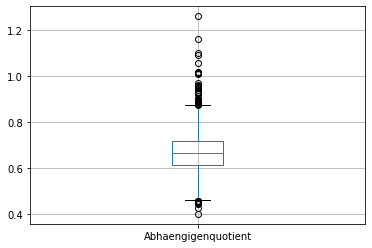

In [23]:
boxplot = gemeinden_geo_2021.boxplot(column=['Abhaengigenquotient'])  , 'Altenquotient', 'Jugendquotient'

In [24]:
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Verteilung Jugendquotient')

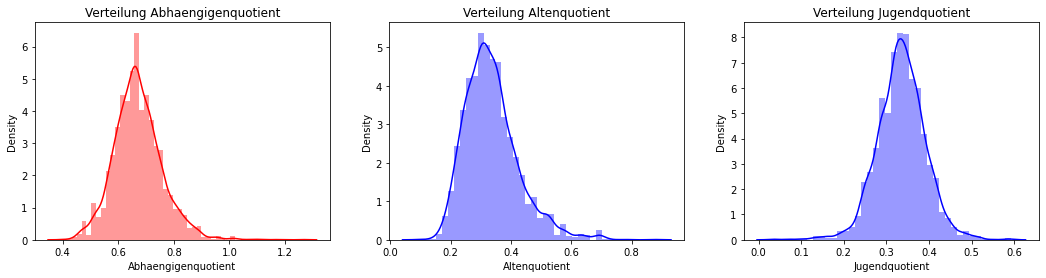

In [25]:
f= plt.figure(figsize=(18,4))

ax=f.add_subplot(131)
sns.distplot(gemeinden_geo_2021['Abhaengigenquotient'],bins=50,color='r',ax=ax)
ax.set_title('Verteilung Abhaengigenquotient')

ax=f.add_subplot(132)
df = gemeinden_geo_2021[gemeinden_geo_2021['Altenquotient'] > 0]
sns.distplot(df['Altenquotient'],bins=40,color='b',ax=ax)
ax.set_title('Verteilung Altenquotient')

ax=f.add_subplot(133)
sns.distplot((df['Jugendquotient']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung Jugendquotient')

In [26]:
print(gemeinden_geo_2021[['Abhaengigenquotient','Altenquotient', 'Jugendquotient']].describe())# , 

       Abhaengigenquotient  Altenquotient  Jugendquotient
count          3155.000000    3155.000000     3155.000000
mean              0.670927       0.335942        0.334985
std               0.086243       0.089628        0.056774
min               0.399103       0.094170        0.030303
25%               0.614253       0.273528        0.299986
50%               0.664653       0.323668        0.335484
75%               0.718707       0.380048        0.369887
max               1.261538       0.876923        0.592593


## Verteilung:
Nach optischer beurteilung entspricht Verteilung etwa einer Normalverteilung um den jeweiligen Mittelwert. Allerdings scheinen alle Verteilung ein wenig Langschwänzig - respektive der Altenquotient immer noch leicht rechtsschief. --> allenfalls weitere Analysen: Q-Q-Plot 


In [27]:
type(gemeinden_geo_2021)

pandas.core.frame.DataFrame

In [28]:
region_dict =	{
  "Ostschweiz": ["SG", "TG", "SH", "AR", "AI", "GL", "GR"],
  "Genferseeregion": ["GE", "VD", "VS"],
  "EspaceMittelland": ["BE", "FR", "SO", "NE", "JU"],
  "Nordwestschweiz": ["BL", "BS", "AG"],
  "Zürich" : ["ZH"],
  "Zentralschweiz" : ["LU", "UR", "SZ", "NW", "OW", "ZG"],
  "Tessin": ["TI"]
}


In [29]:

kanton_region= dict()
for region in region_dict.items():
    for kantone in region[1:]:
        for kanton in kantone:
            kanton_region[kanton] = region[0]


print(kanton_region)

{'SG': 'Ostschweiz', 'TG': 'Ostschweiz', 'SH': 'Ostschweiz', 'AR': 'Ostschweiz', 'AI': 'Ostschweiz', 'GL': 'Ostschweiz', 'GR': 'Ostschweiz', 'GE': 'Genferseeregion', 'VD': 'Genferseeregion', 'VS': 'Genferseeregion', 'BE': 'EspaceMittelland', 'FR': 'EspaceMittelland', 'SO': 'EspaceMittelland', 'NE': 'EspaceMittelland', 'JU': 'EspaceMittelland', 'BL': 'Nordwestschweiz', 'BS': 'Nordwestschweiz', 'AG': 'Nordwestschweiz', 'ZH': 'Zürich', 'LU': 'Zentralschweiz', 'UR': 'Zentralschweiz', 'SZ': 'Zentralschweiz', 'NW': 'Zentralschweiz', 'OW': 'Zentralschweiz', 'ZG': 'Zentralschweiz', 'TI': 'Tessin'}


In [30]:
#print(gemeinden_geo_2021['Kantonskürzel'].head)
print(gemeinden_geo_2021.shape)
#print(gemeinden_geo_2021['Kantonskürzel'].__hash__)
print(type(kanton_region))
gemeinden_geo_2021['Region'] = gemeinden_geo_2021['Kantonskürzel']
# Print the dictionary
print(kanton_region)



(3155, 54)
<class 'dict'>
{'SG': 'Ostschweiz', 'TG': 'Ostschweiz', 'SH': 'Ostschweiz', 'AR': 'Ostschweiz', 'AI': 'Ostschweiz', 'GL': 'Ostschweiz', 'GR': 'Ostschweiz', 'GE': 'Genferseeregion', 'VD': 'Genferseeregion', 'VS': 'Genferseeregion', 'BE': 'EspaceMittelland', 'FR': 'EspaceMittelland', 'SO': 'EspaceMittelland', 'NE': 'EspaceMittelland', 'JU': 'EspaceMittelland', 'BL': 'Nordwestschweiz', 'BS': 'Nordwestschweiz', 'AG': 'Nordwestschweiz', 'ZH': 'Zürich', 'LU': 'Zentralschweiz', 'UR': 'Zentralschweiz', 'SZ': 'Zentralschweiz', 'NW': 'Zentralschweiz', 'OW': 'Zentralschweiz', 'ZG': 'Zentralschweiz', 'TI': 'Tessin'}


In [31]:
# Use Dataframe.dtypes to
# give the series of 
# data types as result
datatypes = gemeinden_geo_2021.dtypes
  
# Print the data types
# of each column
datatypes

Ortschaftsname                                    object
Gemeindecode                                       int64
Einwohner                                          int64
Veränderung in %                                 float64
Bevölkerungs-dichte pro km²                      float64
Ausländer in %                                   float64
0-19 Jahre                                       float64
20-64 Jahre                                      float64
65 Jahre und mehr                                float64
Rohe Heiratssziffer                              float64
Rohe Scheidungsziffer                            float64
Rohe Geburtenziffer                              float64
Rohe Sterbeziffer                                float64
Anzahl Privathaushalte                             int64
Durchschnittliche Haushaltsgrösse in Personen    float64
Gesamtfläche in km² 1)                           float64
Siedlungsfläche in %                             float64
Veränderung in ha              

In [32]:
# mmmhm Region and Ortschaftsname are of type object
df = pd.DataFrame(gemeinden_geo_2021.infer_objects())
print(type(df))
df['Region'] = df['Region'].astype(str)
#df[['Region', 'Kantonskürzel']] = df[['Region', 'Kantonskürzel']].apply(pd.to_string)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Ortschaftsname                                    object
Gemeindecode                                       int64
Einwohner                                          int64
Veränderung in %                                 float64
Bevölkerungs-dichte pro km²                      float64
Ausländer in %                                   float64
0-19 Jahre                                       float64
20-64 Jahre                                      float64
65 Jahre und mehr                                float64
Rohe Heiratssziffer                              float64
Rohe Scheidungsziffer                            float64
Rohe Geburtenziffer                              float64
Rohe Sterbeziffer                                float64
Anzahl Privathaushalte                             int64
Durchschnittliche Haushaltsgrösse in Personen    float64
Gesamtfläche in km² 1)                           float64
Siedlungsfläche in %                             f

In [33]:

# Remap the values of the dataframe
gemeinden_geo_2021.replace({'Region': kanton_region}, inplace=True)
gemeinden_geo_2021

,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,Gemeindename,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N,Altenquotient,Jugendquotient,Abhaengigenquotient,Region
0,Aeugst am Albis,1,1981,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,7.065355,...,Aeugst am Albis,ZH,2679435.817,1235653.185,47.267004,8.488313,0.289773,0.318182,0.607955,Zürich
1,Zwillikon,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,Affoltern am Albis,ZH,2675104.519,1237890.488,47.287633,8.431459,0.294583,0.327007,0.621590,Zürich
2,Affoltern am Albis,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,Affoltern am Albis,ZH,2676439.358,1236966.371,47.279169,8.448945,0.294583,0.327007,0.621590,Zürich
3,Bonstetten,3,5572,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,4.316547,...,Bonstetten,ZH,2677798.571,1241024.843,47.315510,8.467611,0.276245,0.395021,0.671266,Zürich
4,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,Hausen am Albis,ZH,2682996.334,1232961.650,47.242360,8.534860,0.300802,0.370766,0.671569,Zürich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Damvant,6809,1085,-6.060606,26.508673,8.387097,17.788018,55.483871,26.728111,5.504587,...,Haute-Ajoie,JU,2559098.174,1247002.846,47.372587,6.897077,0.481728,0.320598,0.802326,EspaceMittelland
3151,Miécourt,6810,1142,-3.952902,36.755713,5.954466,21.366025,54.028021,24.605954,1.736111,...,La Baroche,JU,2580216.676,1252840.718,47.426069,7.176427,0.455429,0.395462,0.850891,EspaceMittelland
3152,Charmoille,6810,1142,-3.952902,36.755713,5.954466,21.366025,54.028021,24.605954,1.736111,...,La Baroche,JU,2582326.307,1252547.066,47.423488,7.204399,0.455429,0.395462,0.850891,EspaceMittelland
3153,Fregiécourt,6810,1142,-3.952902,36.755713,5.954466,21.366025,54.028021,24.605954,1.736111,...,La Baroche,JU,2581835.105,1251236.381,47.411686,7.197943,0.455429,0.395462,0.850891,EspaceMittelland


In [44]:
excel_file = pd.ExcelFile("./Rohdaten/raumgliederungen.xlsx")
raumgliederungen = pd.read_excel(excel_file)

In [45]:
raumgliederungen.head


<bound method NDFrame.head of           Unnamed: 0          Unnamed: 1      Unnamed: 2 Unnamed: 3  \
0     BFS Gde-nummer        Gemeindename  Kantons-nummer     Kanton   
1                NaN                 NaN             NaN        NaN   
2                  1     Aeugst am Albis               1         ZH   
3                  2  Affoltern am Albis               1         ZH   
4                  3          Bonstetten               1         ZH   
...              ...                 ...             ...        ...   
2142            6806        Vendlincourt              26         JU   
2143            6807       Basse-Allaine              26         JU   
2144            6808       Clos du Doubs              26         JU   
2145            6809         Haute-Ajoie              26         JU   
2146            6810          La Baroche              26         JU   

          Unnamed: 4   Unnamed: 5  Agglomerationen 2012  
0     Bezirks-nummer  Bezirksname  Agglomerationen 2012  
1

In [46]:
new_header = raumgliederungen.iloc[0]
raumgliederungen.columns = new_header
raumgliederungen = raumgliederungen.drop([0, 1],)



In [47]:
print(raumgliederungen.head)
raumgliederungen.to_excel('./Daten/Test.xlsx')

<bound method NDFrame.head of 0    BFS Gde-nummer        Gemeindename Kantons-nummer Kanton Bezirks-nummer  \
2                 1     Aeugst am Albis              1     ZH            101   
3                 2  Affoltern am Albis              1     ZH            101   
4                 3          Bonstetten              1     ZH            101   
5                 4     Hausen am Albis              1     ZH            101   
6                 5            Hedingen              1     ZH            101   
...             ...                 ...            ...    ...            ...   
2142           6806        Vendlincourt             26     JU           2603   
2143           6807       Basse-Allaine             26     JU           2603   
2144           6808       Clos du Doubs             26     JU           2603   
2145           6809         Haute-Ajoie             26     JU           2603   
2146           6810          La Baroche             26     JU           2603   

0    Bezi

In [48]:
def f(row):
    if row['BFS Gde-nummer'] == row['Agglomerationen 2012']:
        val = 'Stadt'
    elif 0 < row['Agglomerationen 2012']:
        val = 'Agglomeration'
    else:
        val = 'Land'
    return val

In [49]:
print(raumgliederungen.dtypes)

# using dictionary to convert specific columns
convert_dict = {'BFS Gde-nummer': int,
                'Agglomerationen 2012': int
               }
  
raumgliederungen  = raumgliederungen.astype(convert_dict)
print(raumgliederungen.dtypes)

0
BFS Gde-nummer          object
Gemeindename            object
Kantons-nummer          object
Kanton                  object
Bezirks-nummer          object
Bezirksname             object
Agglomerationen 2012    object
dtype: object
0
BFS Gde-nummer           int32
Gemeindename            object
Kantons-nummer          object
Kanton                  object
Bezirks-nummer          object
Bezirksname             object
Agglomerationen 2012     int32
dtype: object


In [60]:
raumgliederungen['Charakter'] =  raumgliederungen.apply(f, axis=1)

In [61]:
raumgliederungen.head

<bound method NDFrame.head of 0     BFS Gde-nummer        Gemeindename Kantons-nummer Kanton Bezirks-nummer  \
2                  1     Aeugst am Albis              1     ZH            101   
3                  2  Affoltern am Albis              1     ZH            101   
4                  3          Bonstetten              1     ZH            101   
5                  4     Hausen am Albis              1     ZH            101   
6                  5            Hedingen              1     ZH            101   
...              ...                 ...            ...    ...            ...   
2142            6806        Vendlincourt             26     JU           2603   
2143            6807       Basse-Allaine             26     JU           2603   
2144            6808       Clos du Doubs             26     JU           2603   
2145            6809         Haute-Ajoie             26     JU           2603   
2146            6810          La Baroche             26     JU           2603  

In [62]:
gemeinden_character = pd.merge(gemeinden_geo_2021, raumgliederungen, left_on='Gemeindecode', right_on='BFS Gde-nummer', how='left').drop(['BFS Gde-nummer','Gemeindename_y', 'Kantons-nummer', 'Kanton'], axis=1)

In [59]:
gemeinden_character.to_excel('./Daten/Gemeinde inkl. Charakter & DemoKpi.xlsx')

In [63]:
!pip install pyshp

     -------------------------------------- 46.2/46.2 KB 580.6 kB/s eta 0:00:00


In [ ]:
def check_geojson_file_exisits(shp_dir,country,boundery_file):
    # https://newbedev.com/javascript-convert-shp-to-geojson-using-python-code-example
    # https://stackoverflow.com/questions/43119040/shapefile-into-geojson-conversion-python-3
 
    _json_file = os.path.join(shp_dir,country,boundery_file + '.geojson')
    if not os.path.isfile(_json_file):
        _shp_file = os.path.join(shp_dir,country,boundery_file + '.shp')
 
        shp_file = geopandas.read_file(_shp_file, mask=None)
        # LV95 to WGS84 
        shp_file= shp_file.set_crs(2056, allow_override=True)
        shp_file= shp_file.to_crs(4326)
        shp_file.to_file(_json_file, driver='GeoJSON')
 
    return _json_file
 
def  geojson_read_file(geojson_file):
    return geopandas.read_file(geojson_file) 
